# My Fitness Data

This is an exploration of my fitness data from the 30th November 2020. Looking into how much I cycled, ran and walked over the 15 week period. The running exploration notebook looked at marathon times and training. I wanted to get an idea of where I am at currently and how much training would be needed for a sub 3 hour marathon.

I will use Logistic Regression and Bayes to train and predict the categories.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline


In [2]:
my_df = pd.read_csv("workouts.csv")
df = pd.read_csv("cleaned_marathon.csv")

In [3]:
my_df.columns

Index(['Title', 'WorkoutType', 'WorkoutDescription', 'PlannedDuration',
       'PlannedDistanceInMeters', 'WorkoutDay', 'CoachComments',
       'DistanceInMeters', 'PowerAverage', 'PowerMax', 'Energy',
       'AthleteComments', 'TimeTotalInHours', 'VelocityAverage', 'VelocityMax',
       'CadenceAverage', 'CadenceMax', 'HeartRateAverage', 'HeartRateMax',
       'TorqueAverage', 'TorqueMax', 'IF', 'TSS', 'HRZone1Minutes',
       'HRZone2Minutes', 'HRZone3Minutes', 'HRZone4Minutes', 'HRZone5Minutes',
       'HRZone6Minutes', 'HRZone7Minutes', 'HRZone8Minutes', 'HRZone9Minutes',
       'HRZone10Minutes', 'PWRZone1Minutes', 'PWRZone2Minutes',
       'PWRZone3Minutes', 'PWRZone4Minutes', 'PWRZone5Minutes',
       'PWRZone6Minutes', 'PWRZone7Minutes', 'PWRZone8Minutes',
       'PWRZone9Minutes', 'PWRZone10Minutes', 'Rpe', 'Feeling'],
      dtype='object')

In [4]:
cols_to_drop = ['Title', 'WorkoutDescription', 'PlannedDuration',
                'PlannedDistanceInMeters', 'CoachComments',
                'PowerAverage', 'PowerMax', 'Energy','HRZone9Minutes',
               'AthleteComments', 'VelocityAverage', 'VelocityMax',
               'CadenceAverage', 'CadenceMax', 'HRZone5Minutes',
               'TorqueAverage', 'TorqueMax', 'HRZone1Minutes',
               'HRZone2Minutes', 'HRZone3Minutes', 'HRZone4Minutes', 
               'HRZone6Minutes', 'HRZone7Minutes', 'HRZone8Minutes', 
               'HRZone10Minutes', 'PWRZone1Minutes', 'PWRZone2Minutes',
               'PWRZone3Minutes', 'PWRZone4Minutes', 'PWRZone5Minutes',
               'PWRZone6Minutes', 'PWRZone7Minutes', 'PWRZone8Minutes',
               'PWRZone9Minutes', 'PWRZone10Minutes', 'Rpe', 'Feeling']
my_df = my_df.drop(columns=cols_to_drop)

In [5]:
my_df.head()

,WorkoutType,WorkoutDay,DistanceInMeters,TimeTotalInHours,HeartRateAverage,HeartRateMax,IF,TSS
0,Run,2020-11-30,16120.389648,1.450522,141.0,158.0,0.822064,109.63
1,Run,2020-12-02,7439.640137,0.658955,136.0,148.0,0.840057,50.97
2,Bike,2020-12-03,42495.191406,2.069444,127.0,140.0,0.680521,95.37
3,Run,2020-12-04,5016.410156,0.331941,170.0,179.0,1.114853,44.46
4,Walk,2020-12-05,25441.029297,6.989309,NaN,NaN,0.380311,117.57


In [6]:
rename_cols = {"WorkoutType": "workout_type", "WorkoutDay": "workout_day", "DistanceInMeters": "distance_meters",
             "TimeTotalInHours": "time_hours", "HeartRateAverage": "avg_heart_rate", "HeartRateMax": "max_heart_rate",
             "IF": "if", "TSS": "tss"}

my_df.rename(columns=rename_cols, inplace=True)

In [7]:
my_df.head()

,workout_type,workout_day,distance_meters,time_hours,avg_heart_rate,max_heart_rate,if,tss
0,Run,2020-11-30,16120.389648,1.450522,141.0,158.0,0.822064,109.63
1,Run,2020-12-02,7439.640137,0.658955,136.0,148.0,0.840057,50.97
2,Bike,2020-12-03,42495.191406,2.069444,127.0,140.0,0.680521,95.37
3,Run,2020-12-04,5016.410156,0.331941,170.0,179.0,1.114853,44.46
4,Walk,2020-12-05,25441.029297,6.989309,NaN,NaN,0.380311,117.57


In [8]:
my_df["distance_miles"] = my_df["distance_meters"] * 0.0006213712
my_df["miles_per_hour"] = my_df["distance_miles"] / my_df["time_hours"]
my_df["mins_per_mile"] = 60 / my_df["miles_per_hour"]

In [9]:
my_df.head()

,workout_type,workout_day,distance_meters,time_hours,avg_heart_rate,max_heart_rate,if,tss,distance_miles,miles_per_hour,mins_per_mile
0,Run,2020-11-30,16120.389648,1.450522,141.0,158.0,0.822064,109.63,10.016746,6.905615,8.688582
1,Run,2020-12-02,7439.640137,0.658955,136.0,148.0,0.840057,50.97,4.622778,7.015320,8.552711
2,Bike,2020-12-03,42495.191406,2.069444,127.0,140.0,0.680521,95.37,26.405288,12.759602,4.702341
3,Run,2020-12-04,5016.410156,0.331941,170.0,179.0,1.114853,44.46,3.117053,9.390371,6.389524
4,Walk,2020-12-05,25441.029297,6.989309,NaN,NaN,0.380311,117.57,15.808323,2.261786,26.527705


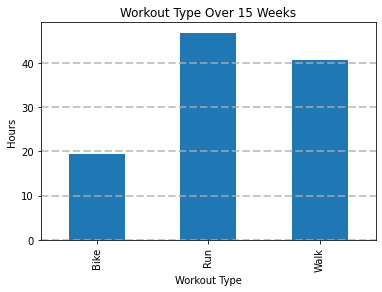

In [10]:
my_df.groupby("workout_type").sum()["time_hours"].plot(kind = "bar");
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Workout Type Over 15 Weeks")
plt.ylabel("Hours")
plt.xlabel("Workout Type");

In [11]:
my_df["workout_day"] = pd.to_datetime(my_df["workout_day"])

In [12]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   workout_type     74 non-null     object        
 1   workout_day      74 non-null     datetime64[ns]
 2   distance_meters  74 non-null     float64       
 3   time_hours       74 non-null     float64       
 4   avg_heart_rate   64 non-null     float64       
 5   max_heart_rate   64 non-null     float64       
 6   if               74 non-null     float64       
 7   tss              74 non-null     float64       
 8   distance_miles   74 non-null     float64       
 9   miles_per_hour   74 non-null     float64       
 10  mins_per_mile    74 non-null     float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 6.5+ KB


In [13]:
my_df.head(1)

,workout_type,workout_day,distance_meters,time_hours,avg_heart_rate,max_heart_rate,if,tss,distance_miles,miles_per_hour,mins_per_mile
0,Run,2020-11-30,16120.389648,1.450522,141.0,158.0,0.822064,109.63,10.016746,6.905615,8.688582


In [14]:
my_df["month"] = my_df["workout_day"].dt.month
my_df["week"] = my_df["workout_day"].dt.isocalendar().week

In [15]:
my_df.head()

,workout_type,workout_day,distance_meters,time_hours,avg_heart_rate,max_heart_rate,if,tss,distance_miles,miles_per_hour,mins_per_mile,month,week
0,Run,2020-11-30,16120.389648,1.450522,141.0,158.0,0.822064,109.63,10.016746,6.905615,8.688582,11,49
1,Run,2020-12-02,7439.640137,0.658955,136.0,148.0,0.840057,50.97,4.622778,7.015320,8.552711,12,49
2,Bike,2020-12-03,42495.191406,2.069444,127.0,140.0,0.680521,95.37,26.405288,12.759602,4.702341,12,49
3,Run,2020-12-04,5016.410156,0.331941,170.0,179.0,1.114853,44.46,3.117053,9.390371,6.389524,12,49
4,Walk,2020-12-05,25441.029297,6.989309,NaN,NaN,0.380311,117.57,15.808323,2.261786,26.527705,12,49


In [16]:
month_change = {11: 1, 12: 1, 1: 2, 2:3, 3:4}
week_change = {49: 1, 50: 2, 51: 3, 52: 4, 53: 5, 2: 6, 3: 7, 4: 8, 5: 9,
               6: 10, 7: 11, 8: 12, 9: 13, 10: 14, 11: 15}

In [17]:
my_df["month"] = my_df["month"].replace(month_change)

In [18]:
my_df["month"].value_counts()

1    23
3    19
2    17
4    15
Name: month, dtype: int64

In [19]:
my_df["week"] = my_df["week"].replace(week_change)

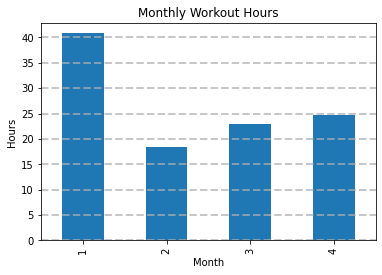

In [20]:
my_df.groupby("month")["time_hours"].sum().plot(kind="bar");
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Monthly Workout Hours")
plt.ylabel("Hours")
plt.xlabel("Month");

In [163]:
#Average weekly hours spent exercising over the 15 week period
my_df["time_hours"].sum() / 15

7.12396884461244

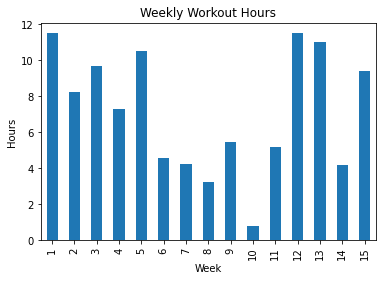

In [22]:
my_df.groupby("week")["time_hours"].sum().plot(kind="bar");
plt.title("Weekly Workout Hours")
plt.ylabel("Hours")
plt.xlabel("Week");

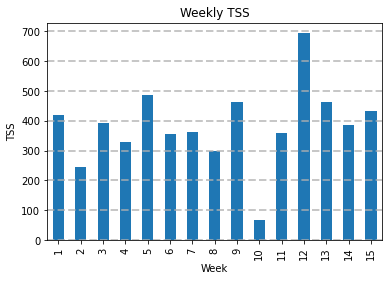

In [23]:
my_df.groupby("week")["tss"].sum().plot(kind="bar");
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Weekly TSS")
plt.ylabel("TSS")
plt.xlabel("Week");

Noteable Run Dates:

- 12/31 10km PB (Mid week 5)
- 01/31 5km PB (End week 9)
- 03/19 14 mile run (unplanned distance but set half marathon PB, week 15)

Now I will look at just my running data. The fitness data included a lot of walking, which accounted for a lot of hours.


In [24]:
my_run_df = my_df[my_df["workout_type"] == "Run"]

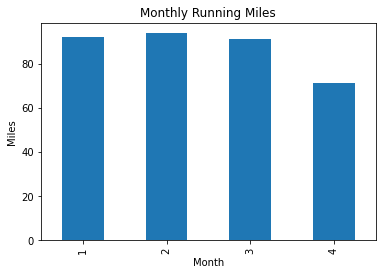

In [25]:
my_run_df.groupby("month")["distance_miles"].sum().plot(kind="bar");
plt.title("Monthly Running Miles")
plt.ylabel("Miles")
plt.xlabel("Month");

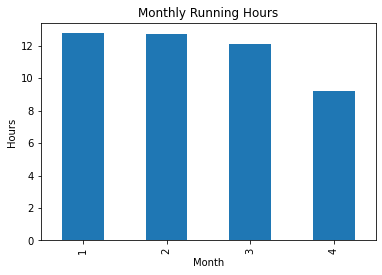

In [26]:
my_run_df.groupby("month")["time_hours"].sum().plot(kind="bar");
plt.title("Monthly Running Hours")
plt.ylabel("Hours")
plt.xlabel("Month");

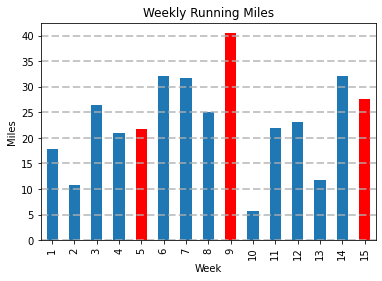

In [27]:
colors = ["tab:blue"] * 15
colors[4] = "r"
colors[8] = "r"
colors[14] = "r"

my_run_df.groupby("week")["distance_miles"].sum().plot(kind="bar", color=colors);
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Weekly Running Miles")
plt.ylabel("Miles")
plt.xlabel("Week");

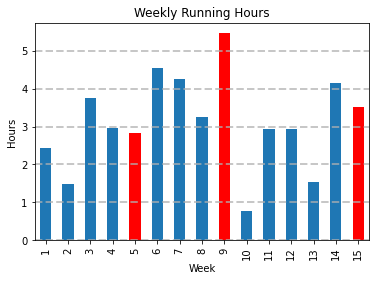

In [28]:
colors = ["tab:blue"] * 15
colors[4] = "r"
colors[8] = "r"
colors[14] = "r"

my_run_df.groupby("week")["time_hours"].sum().plot(kind="bar", color=colors);
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Weekly Running Hours")
plt.ylabel("Hours")
plt.xlabel("Week");

From the two charts above, we can see my best running times came at the end of the blocks. Which means I had a good 2/3 weeks of traning before the week. In future, I will try to do some timed runs after an easy week as this should produce better results. 

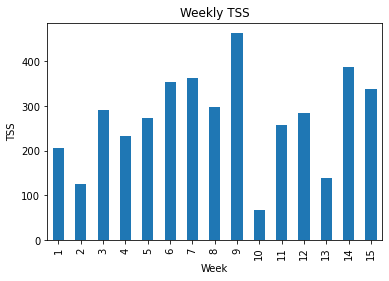

In [29]:
my_run_df.groupby("week")["tss"].sum().plot(kind="bar");
plt.title("Weekly TSS")
plt.ylabel("TSS")
plt.xlabel("Week");

TSS, hours and miles are all going to be strongly correlated. Most of my running is done at a lower heart rate easy pace.

In [30]:
#5 Longest runs
my_run_df.sort_values("distance_miles", ascending=False)[:5]

,workout_type,workout_day,distance_meters,time_hours,avg_heart_rate,max_heart_rate,if,tss,distance_miles,miles_per_hour,mins_per_mile,month,week
53,Run,2021-02-23,22542.609375,1.810975,154.0,167.0,0.922018,173.14,14.007328,7.734690,7.757260,3,12
72,Run,2021-03-19,22539.099609,1.646059,NaN,NaN,1.001596,185.23,14.005147,8.508288,7.051947,4,15
42,Run,2021-02-04,16330.910156,1.356666,149.0,165.0,0.872496,115.28,10.147557,7.479773,8.021634,3,9
0,Run,2020-11-30,16120.389648,1.450522,141.0,158.0,0.822064,109.63,10.016746,6.905615,8.688582,1,1
35,Run,2021-01-24,16099.849609,1.356310,147.0,164.0,0.874301,115.74,10.003983,7.375881,8.134622,2,7


In [31]:
my_run_df.sort_values("miles_per_hour", ascending=False)[:10]

,workout_type,workout_day,distance_meters,time_hours,avg_heart_rate,max_heart_rate,if,tss,distance_miles,miles_per_hour,mins_per_mile,month,week
65,Run,2021-03-08,5009.850098,0.319142,175.0,180.0,1.154324,45.79,3.112977,9.754207,6.151192,4,14
39,Run,2021-01-31,5012.479980,0.319444,175.0,182.0,1.138292,44.56,3.114611,9.750112,6.153775,2,8
3,Run,2020-12-04,5016.410156,0.331941,170.0,179.0,1.114853,44.46,3.117053,9.390371,6.389524,1,1
55,Run,2021-02-25,5012.819824,0.332230,169.0,174.0,1.096351,43.07,3.114822,9.375507,6.399654,3,12
32,Run,2021-01-20,6446.529785,0.440789,172.0,180.0,1.056474,53.40,4.005688,9.087537,6.602449,2,7
21,Run,2020-12-30,10015.139648,0.694026,176.0,184.0,1.064699,86.34,6.223119,8.966701,6.691424,1,5
5,Run,2020-12-08,3157.300049,0.219709,166.0,173.0,1.059733,26.32,1.961855,8.929317,6.719439,1,2
30,Run,2021-01-16,10011.730469,0.704923,173.0,182.0,1.059122,86.84,6.221001,8.825074,6.798810,2,6
72,Run,2021-03-19,22539.099609,1.646059,NaN,NaN,1.001596,185.23,14.005147,8.508288,7.051947,4,15
45,Run,2021-02-07,11811.790039,0.940727,150.0,162.0,0.928111,89.64,7.339506,7.801952,7.690383,3,9


Best Times:
- 5km: 19m08s
- 10km: 41m33s
- 14 miles: 1h39m

This times were taken at various points, so may not be a geat indicator. Before modelling, I want to try and predict my marathon time based on how much these times vary as I increase the distance. The 14 mile run, was not flat out though but the 5/10km were. The 10km time was taken at week 5 though, so my fitness would of improved a lot by then.

As you can see from the table above. The top row (index 65) and index 21 (10km), they have pretty much similar heart rate. This means my 5km time is probably not my true personal best. 5km is a VO2 max event, which I always struggle with but this could have an impact on the predictions. My threshold heartrate has always been around 175, so this is my one hour heart rate.


In [32]:
best_5km = 0.319142
best_10km = 0.694026 
best_14_mile = 1.646059

#Let's start by doubling the 5km time and seeing the difference 
new_5km = best_5km * 2
difference = round(best_10km / new_5km * 100 - 100, 2)
print("Difference from 5km to 10km is {}%".format(difference))

Difference from 5km to 10km is 8.73%


In [33]:
new_10km = best_10km * 2
difference_10km_to_14_miles = round(best_14_mile / new_10km * 100 - 100, 2)
print("Difference is 10km to 14 miles is {}%".format(difference_10km_to_14_miles))

Difference is 10km to 14 miles is 18.59%


As expected the decrease in performance becomes greater the further distance ran. As mentioned earlier, the 14 miles was not flat out and was "comfortable-ish". Also, the plan was only to run about 7/8 miles that day. My body is built better for endurance than speed, so I will get the decrease at around 20% in performance from half marathon to marathon. Now we can see a possible marathon time based on my previous 14 mile run.

In [34]:
marathon_preidction = best_14_mile * 2 * 1.20
print(marathon_preidction)

3.9505415999999998


I haven't been training for a marathon and have only done 2 runs over 10 miles. So at my current fitness level, this could be a pretty realistic prediction. Let's now model the previous marathon data and see what the model predicts my results to be based on my best block and most recent block.

In [35]:
week_6 = my_run_df[my_run_df["week"] == 6]
week_7 = my_run_df[my_run_df["week"] == 7]
week_8 = my_run_df[my_run_df["week"] == 8]
week_9 = my_run_df[my_run_df["week"] == 9]

my_best_block_df = pd.concat([week_6, week_7, week_8, week_9])


In [36]:
total_time_best_block = my_best_block_df["time_hours"].sum()

In [37]:
total_miles_best_block = my_best_block_df["distance_miles"].sum()

In [38]:
print("Total miles for best 4 week block: {}".format(total_miles_best_block))
print("Average weekly miles for best 4 week block: {}".format(total_miles_best_block / 4))
print("-----------------------------------------------------------")
print("Total hours for best 4 week block: {}".format(total_time_best_block))
print("Average weekly hours for best 4 week block: {}".format(total_time_best_block / 4))

Total miles for best 4 week block: 129.2832934651203
Average weekly miles for best 4 week block: 32.320823366280074
-----------------------------------------------------------
Total hours for best 4 week block: 17.525812089443207
Average weekly hours for best 4 week block: 4.381453022360802


In [39]:
miles_per_hour_best_block = my_best_block_df["miles_per_hour"].mean()
print("Miles per hour for best block: {}".format(miles_per_hour_best_block))

Miles per hour for best block: 7.505085055206308


In [40]:
min_per_mile_best_block = my_best_block_df["mins_per_mile"].mean()
print("Minutes per mile for best block: {}".format(min_per_mile_best_block))

Minutes per mile for best block: 8.07960403809552


# Modelling

Bayes and logstic regression will be used for the modelling. There isn't much data, so only the category will be predicted my best training block.

In [41]:
df.head()

,Unnamed: 0,id,km4week,sp4week,MarathonTime,CATEGORY,miles_per_week,miles_per_hour,mins_per_mile
0,0,1,132.8,14.434783,2.37,A,82.518095,8.969358,6.689442
1,1,2,68.6,13.674419,2.59,A,42.626064,8.496890,7.061407
2,2,3,82.7,13.520436,2.66,A,51.387398,8.401210,7.141829
3,3,4,137.5,12.258544,2.68,A,85.438540,7.617106,7.877007
4,4,5,84.6,13.945055,2.74,A,52.568004,8.665056,6.924364


The category column will be predicted in the logistic model, so the string will need to be converted into binary. New categories are shown below.

In [42]:
category_to_binary = {"A": 1, "B": 2, "C": 3, "D":4}

In [43]:
df["CATEGORY"] = df["CATEGORY"].replace(category_to_binary)

In [77]:
x = df[["miles_per_week", "miles_per_hour"]]
y = df["CATEGORY"]

# Bayes Model

In [78]:
bayes = GaussianNB()
cross_val = cross_val_score(bayes, x, y, cv=5)

In [79]:
cross_val.mean().round(2)

0.5

Bayes has a pretty low accuracy of 50% when tested with cross validation. There isn't much data, so the model wasn't expected to perform too well.

In [80]:
bayes.fit(x, y)

GaussianNB()

In [136]:
#My best training times
predict = bayes.predict(np.array([32.32, 7.51]).reshape(1,-1))

In [148]:
predict[0]

2

In [145]:
#Random input
predict_100 = bayes.predict(np.array([100, 7.51]).reshape(1,-1))

In [147]:
predict_100[0]

1

From the two results above, the prediction for my best block is category 2, which is B. That is 3:00-3:20 category. The random input was 100 weekly miles to check to see if the model would predict the best category.

# Logistic Regression Model

In [128]:
log = LogisticRegression()

In [130]:
log.fit(x, y)

LogisticRegression()

In [141]:
log_predict = log.predict(np.array([32.32, 7.51]).reshape(1,-1))
log_predict[0]

2

Both models are predicting the same category based on my best training block. The calculations I made in the running exploration notebook were:
- Miles needed per week: 41.0
- Min per mile 8.25

In [155]:
new_miles_per_hour = 60 / 8.25
new_miles_per_hour

7.2727272727272725

In [157]:
log_predict_estimate = log.predict(np.array([41, new_miles_per_hour]).reshape(1,-1))
log_predict_estimate[0]

2

In [158]:
bayes_predict_estimate = bayes.predict(np.array([41, new_miles_per_hour]).reshape(1,-1))
bayes_predict_estimate[0]

2

In [159]:
log_predict_estimate = log.predict(np.array([50, new_miles_per_hour]).reshape(1,-1))
log_predict_estimate[0]

2

In [162]:
log_predict_estimate = log.predict(np.array([70, new_miles_per_hour]).reshape(1,-1))
log_predict_estimate[0]

1

For 41 miles per week and 8.25 min per mile pace the models are still predicting category 2. The model predicted around 70 miles at this pace would be needed. However, there wasn't much data for the modelling. I think with my current base fitness, I would probably want at least a solid 2 months of 40-55 mile a week training in order to get sub 3 hours.